In [ ]:
# @title Load Drive and Change Folder
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Computer Vision (CS 419 619) | Spring 2024 /Tutorial 4

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1ztBWSRgDAvnXI6ZhiS_SU4CUSVKOAVBX/Computer Vision (CS 419 619) | Spring 2024 /Tutorial 4


In [ ]:
# @title Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import imageio
from scipy import ndimage

Gray = (Red × 0.2989) + (Green × 0.5870) + (Blue × 0.1140)



In [ ]:
# This cell contains teh utility functions used in Phase I

#Define RGB2gray function
def rgb2gray(img):
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

#Detemine gradient function for Fx and Fy using sobel filter(normlized)
def gradient_x(img):
    grad_img = ndimage.convolve(img, np.array([[-1, 0, 1],
                                               [-2, 0, 2],
                                               [-1, 0, 1]]))
    return grad_img/np.max(grad_img)

def gradient_y(img):
    grad_img = ndimage.convolve(img, np.array([[-1, -2, -1],
                                               [0,   0,  0],
                                               [1,   2,  1]]))
    return grad_img/np.max(grad_img)

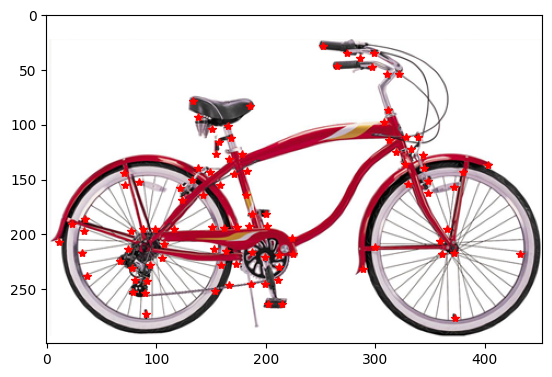

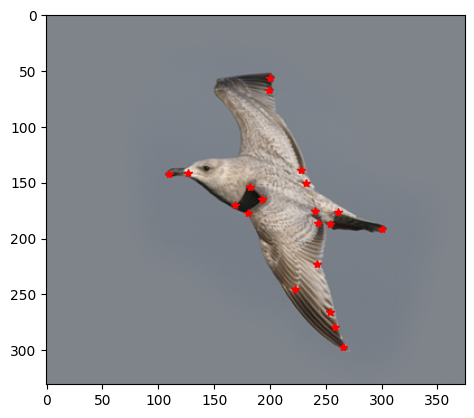

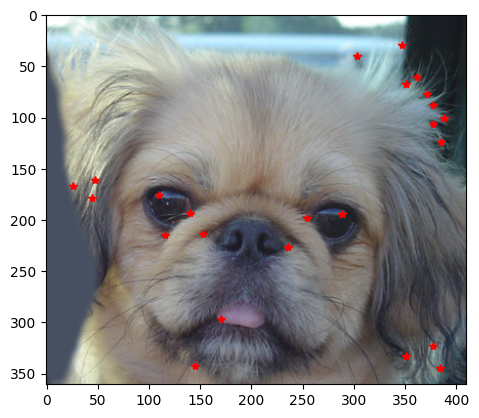

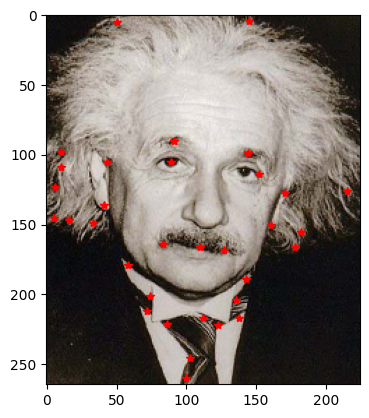

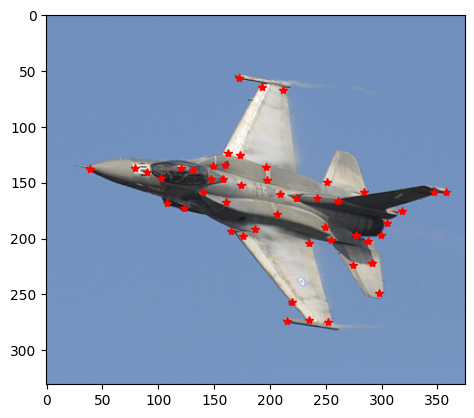

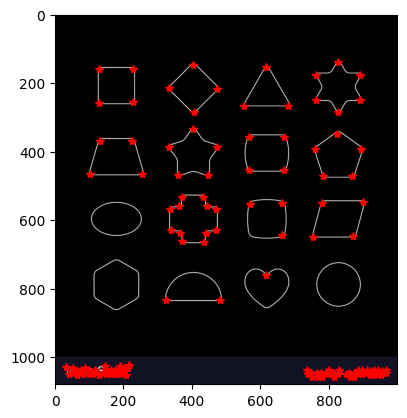

In [ ]:
def harris_corner_detector(img_path, thres_ratio):

    # Phase I: Find filtered gradient
    # ===============================

    # Load the input image from a predefined path and image name
    input_img = imageio.v2.imread(input_path + img_path)

    # Convert the loaded image to grayscale for processing
    gray_input_img = rgb2gray(input_img)

    # Apply Gaussian blurring to the grayscale image to reduce noise and improve gradient calculation
    # This is optional. Since we are consider the window function to be Gaussian, we have performed
    # Gaussian filtering.
    blur_img = ndimage.gaussian_filter(gray_input_img, sigma=1.0)

    # Calculate the gradient of the blurred image along the x-axis
    x_grad = gradient_x(blur_img)

    # Calculate the gradient of the blurred image along the y-axis
    y_grad = gradient_y(blur_img)

    # Phase II : Find cornerness score
    # ================================

    xx_grad = x_grad * x_grad
    yy_grad = y_grad * y_grad
    xy_grad = x_grad * y_grad

    # Initialize a list to hold the coordinates and their cornerness scores
    tuple_data = []

    # Set the empirical constant k used in the cornerness score formula
    k = 0.04

    # Initialize maximum_score to track the highest cornerness score found
    maximum_score = 0

    # Loop through each pixel in the image (excluding the borders to accommodate the window size)
    for row in range(window_half, int(input_img.shape[0] - 1)):
        for col in range(window_half, int(input_img.shape[1] - 1)):

            # Extract the window for each gradient component centered at the current pixel
            window_x = xx_grad[row - window_half: row + window_half + 1, col - window_half: col + window_half + 1]
            window_y = yy_grad[row - window_half: row + window_half + 1, col - window_half: col + window_half + 1]
            window_xy = xy_grad[row - window_half: row + window_half + 1, col - window_half: col + window_half + 1]

            sum_xx = np.sum(window_x)
            sum_yy = np.sum(window_y)
            sum_xy = np.sum(window_xy)

            determinant = (sum_xx * sum_yy) - (sum_xy * sum_xy)
            trace = sum_xx + sum_yy

            cornerness_score = determinant - (k * trace * trace)

            tuple_data.append((row, col, cornerness_score))

            if cornerness_score > maximum_score:
                maximum_score = cornerness_score

    # Calculate the threshold for cornerness score based on the maximum score and the provided ratio
    threshold = thres_ratio * maximum_score

    # Filter out the coordinates with cornerness scores below the threshold
    filtered_data = [tuple_datum for tuple_datum in tuple_data if tuple_datum[-1] > threshold]


    # Phase III : Non maximal suppression
    # ===================================

    # Sort the filtered data by cornerness score in descending order
    sorted_filtered_data = sorted(filtered_data, key=lambda data: data[-1], reverse=True)

    # Initialize the list for final corners after non-maximal suppression
    final_L = [sorted_filtered_data[0][:-1]]  # Start with the highest scoring corner

    # Define the minimum distance between corners to consider them distinct
    dis = 10

    # Initialize lists to hold the x and y coordinates of the final corners
    xc, yc = [], []

    # Iterate through each corner in the sorted list
    for current_corner in sorted_filtered_data:
        # Compare with corners already accepted to ensure they are sufficiently apart
        for accepted_corner in final_L:
            if abs(current_corner[0] - accepted_corner[0]) <= dis and abs(current_corner[1] - accepted_corner[1]) <= dis:
                break
        else:
            # If the corner is sufficiently far from all accepted corners, add it to the final list
            final_L.append(current_corner[:-1])
            xc.append(current_corner[1])
            yc.append(current_corner[0])

    plt.imshow(input_img, cmap=plt.get_cmap('gray'))

    # plt.plot([x for y, x, _ in sorted_filtered_data],
    #          [y for y, x, _ in sorted_filtered_data], '+', color='yellow')

    plt.plot(xc, yc, '*', color='red')
    plt.show()


# Harris Corner Detector Implementation
input_path = "data/"
img_name = ["bicycle.bmp", "bird.bmp", "dog.bmp", "einstein.bmp", "plane.bmp", "toy_image.jpg"]
ratio = [0.05, 0.05, 0.05, 0.05, 0.01, 0.001]
window = 9
window_half = window // 2

for idx, img in enumerate(img_name):
    thres_ratio = ratio[idx]
    harris_corner_detector(img, thres_ratio)
    print("")

thres_ratio :  0.0001


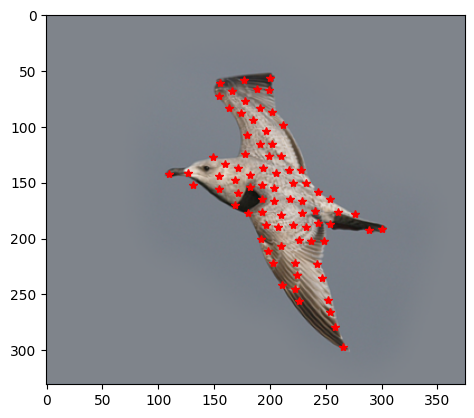


thres_ratio :  0.001


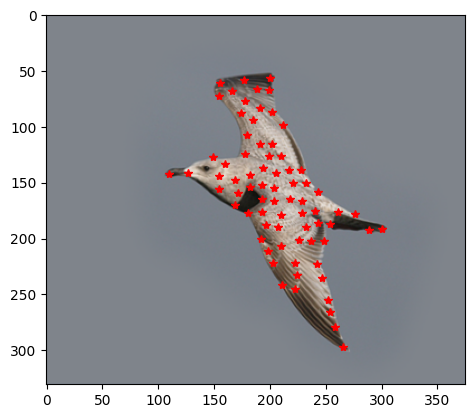


thres_ratio :  0.01


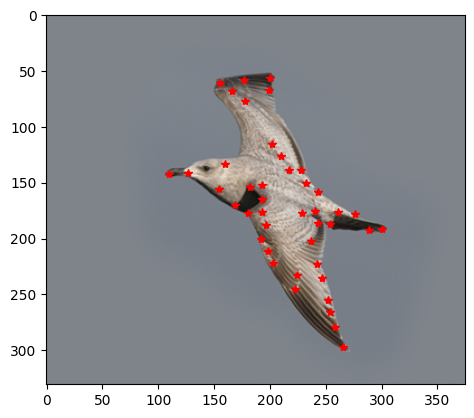


thres_ratio :  0.05


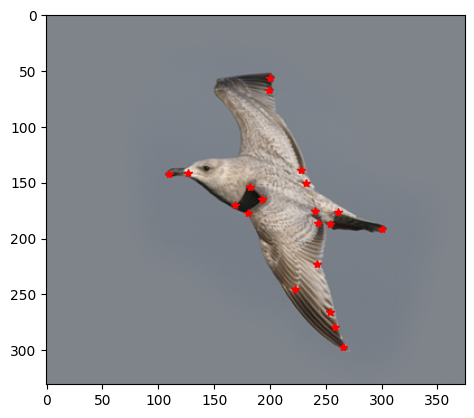


thres_ratio :  0.1


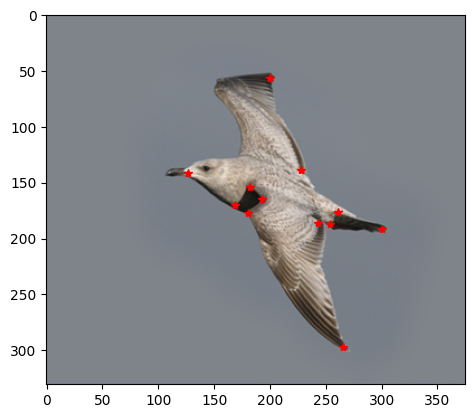


thres_ratio :  0.5


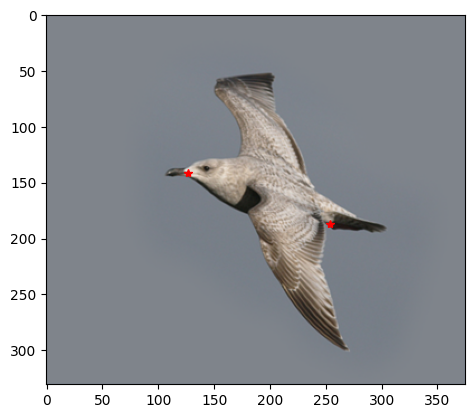


thres_ratio :  0.8


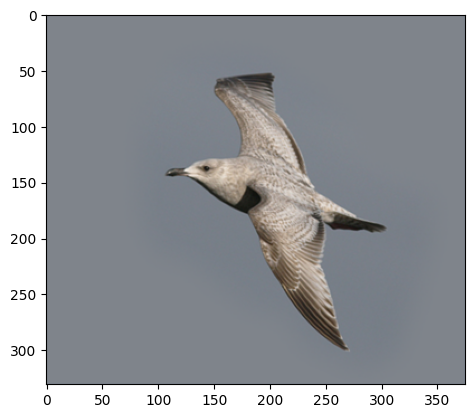


thres_ratio :  0.99


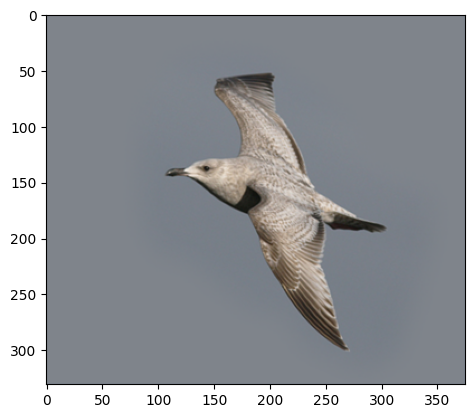

In [ ]:
img_path = img_name[1]

for thres_ratio in [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 0.99]:
    print("thres_ratio : ", thres_ratio)
    harris_corner_detector(img_path, thres_ratio)
    print("")